In [57]:
import numpy as np
from numpy import random
from collections import defaultdict

In [338]:

def create_vec(n):
    vec=[i for i in range(1,n)]
    random.shuffle(vec)
    vec=[0]+vec + [0]
    return vec

def population_lst(population,k,n):
    while len(population)<k:
        population.append(create_vec(n))
    return population


def score(vec,city):
    dist=0
    
    for i in range(len(vec)-1):
        # Print the current index and the values of vec[i] and vec[i+1]
        
        # Now, execute the distance addition
        dist = dist + np.sqrt(np.square(city[vec[i+1]][0] - city[vec[i]][0]) + np.square(city[vec[i+1]][1] - city[vec[i]][1]))


    return dist
    
    



def mutation(vec):
    
    p1=np.random.randint(1,len(vec)-1)
    p2=np.random.randint(1,len(vec)-1)
    vec[p1],vec[p2]=vec[p2],vec[p1]
    return vec

import numpy as np

def reproduction(vec1, vec2):
    """
    Performs ordered crossover between two parent vectors vec1 and vec2
    to generate two offspring vectors.

    Args:
        vec1 (list): First parent vector.
        vec2 (list): Second parent vector.

    Returns:
        tuple: Two offspring vectors (child1, child2).
    """
    # Randomly select two crossover points
    p1, p2 = sorted(np.random.choice(range(1, len(vec1) - 1), size=2, replace=False))
    
    # Ordered Crossover for child1
    child1 = vec1[p1:p2]  # Extract segment from vec1
    remaining = [gene for gene in vec2 if gene not in child1]  # Maintain order from vec2
    child1 = [0] + remaining[:p1 - 1] + child1 + remaining[p1 - 1:] + [0]  # Assemble child1

    # Ordered Crossover for child2
    child2 = vec2[p1:p2]  # Extract segment from vec2
    remaining = [gene for gene in vec1 if gene not in child2]  # Maintain order from vec1
    child2 = [0] + remaining[:p1 - 1] + child2 + remaining[p1 - 1:] + [0]  # Assemble child2
    
    return child1, child2


    
    
       


In [339]:
def genetic(pop_size, num_runs, n, city, factor):
    population = population_lst([], pop_size, n)
    for iteration in range(num_runs):
        
        population.sort(key=lambda x: score(x, city))
        new_population = population[: int(pop_size * factor / 100)]  # Elitism
        while len(new_population) < pop_size:
            parent1, parent2 = random.sample(population[: int(pop_size / 2)], 2)
            child1,child2=(reproduction(parent1, parent2))
            
            new_population.extend([child1, child2])
        population = new_population[:pop_size]
        
    population.sort(key=lambda x: score(x, city))
   
    return population[0], score(population[0], city)  # Best route and its score

              
        
        

In [340]:


# Assuming all your previously defined functions (create_vec, population_lst, score, mutation, reproduction) are here

def main():
    # Test Case 1: 4 Cities
    city1 = [(0, 0), (1, 2), (3, 1), (4, 4)]
    pop_size = 10
    num_runs = 99
    factor = 50  # Top 50% survivors in each generation
    best_route1 = genetic(pop_size, num_runs, len(city1), city1, factor)
    print("Best route for Test Case 1:", best_route1)
    #print("Distance for Best Route Test Case 1:", score(best_route1, city1))
    
    # Test Case 2: 5 Cities
    city2 = [(0, 0), (2, 2), (3, 4), (5, 2), (6, 0)]
    best_route2 = genetic(pop_size, num_runs, len(city2), city2, factor)
    print("Best route for Test Case 2:", best_route2)
    #print("Distance for Best Route Test Case 2:", score(best_route2, city2))
    
    # Test Case 3: 6 Cities
    city3 = [(0, 0), (2, 1), (3, 5), (5, 6), (7, 3), (9, 1)]
    best_route3 = genetic(pop_size, num_runs, len(city3), city3, factor)
    print("Best route for Test Case 3:", best_route3)
    #print("Distance for Best Route Test Case 3:", score(best_route3, city3))

if __name__ == "__main__":
    main()


Best route for Test Case 1: ([0, 2, 3, 1, 0], 12.166174573300538)
Best route for Test Case 2: ([0, 1, 2, 3, 4, 0], 16.12899020449196)
Best route for Test Case 3: ([0, 0, 0, 0, 0, 2, 3, 4, 5, 1, 0, 0, 0, 0, 0], 23.73706625005506)


Test Case 4: 10 Cities
Optimal Route (Index Order): (4, 8, 3, 7, 6, 0, 1, 2, 9, 5)
Optimal Distance: 37.19842124043896

GENETIC
Best route for Test Case 3: ([0, 0, 0, 6, 3, 7, 8, 4, 5, 9, 2, 1, 0, 0, 0, 0], 37.19842124043897)


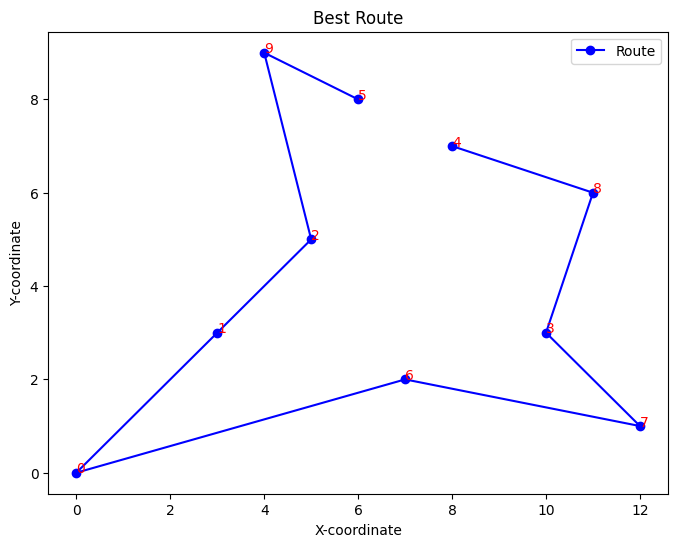

In [345]:
import itertools
import math

# Distance calculation
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Brute-force solution to verify the optimal route and distance
def brute_force_tsp(cities):
    num_cities = len(cities)
    best_distance = float('inf')
    best_route = None
    
    # Iterate over all permutations of the city indices
    for perm in itertools.permutations(range(num_cities)):
        # Calculate the total distance for this permutation
        total_distance = 0
        for i in range(num_cities):
            total_distance += distance(cities[perm[i]], cities[perm[(i+1) % num_cities]])
        
        # Update best route if this one is shorter
        if total_distance < best_distance:
            best_distance = total_distance
            best_route = perm
            
    return best_route, best_distance

# Test Cases
def run_test_cases():
    test_cases = [
       
        {
            "cities": [(0, 0), (3, 3), (5, 5), (10, 3), (8, 7), (6, 8), (7, 2), (12, 1), (11, 6), (4, 9)],
            "name": "Test Case 4: 10 Cities"
        },
    ]

    for case in test_cases:
        print(case["name"])
        cities = case["cities"]
        best_route, best_distance = brute_force_tsp(cities)
        print("Optimal Route (Index Order):", best_route)
        print("Optimal Distance:", best_distance)
        print()
        pop_size = 30
        num_runs = 200
        factor = 50  # Top 50% survivors in each generation
        best_route3 = genetic(pop_size, num_runs, len(cities), cities, factor)
        print("GENETIC")
        print("Best route for Test Case 3:", best_route3)
        plot_route(best_route, cities)
        print()
        print()
        #print("Distance for Best Route Test Case 3:", score(best_route3, cities))
if __name__ == "__main__":
    run_test_cases()


In [343]:
import matplotlib.pyplot as plt

def plot_route(route, city):
    """
    Plots the best route on a 2D graph.
    """
    x = [city[i][0] for i in route]
    y = [city[i][1] for i in route]

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, marker='o', color='blue', label='Route')
    for i, coord in enumerate(route):
        plt.text(city[coord][0], city[coord][1], str(coord), fontsize=10, color='red')
    plt.title("Best Route")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.legend()
    plt.show()


IndexError: list index out of range